### Titanic - machine learning from Disaster 
This is my first attempt to understand Kaggle comeptiton https://www.kaggle.com/c/titanic/overview 

### Goal: 
The main goal of this project is to build predictive model to answer question: <b>what sorts of people were more likely to survive?</b> using passenger data (ie name, age, gender, socio-economic class, etc)? 
However for me as a enthustaist of learning ML it will be great opportunity to gain some practise on: 
- exploring data 
- cleaning data
- feature engineering 
- model selection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
test_data = pd.read_csv('titanic_kaggle/test.csv')

In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data = pd.read_csv('titanic_kaggle/train.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.shape

(418, 11)

In [7]:
train_data.shape

(891, 12)

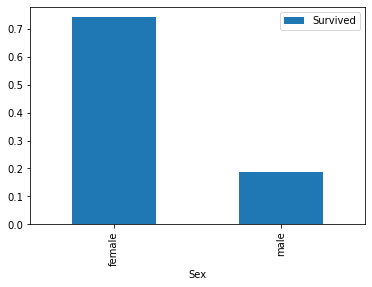

In [8]:
sex_pivot = train_data.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

pclass_pivot = train_data.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Based on above we see that "Age" column has missing values and also "Cabin". 

In [10]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We will try to convert "Age" column to categorical 

In [11]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names) # thanks to  cut pandas function we can group data into main categories 
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ['Missing','Infant','Child','Teenager','Young Adult','Adult','Senior']


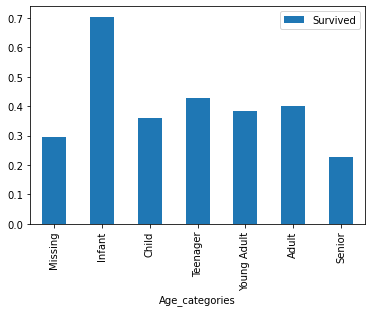

In [12]:
train = process_age(train_data, cut_points,label_names)
test = process_age(test_data, cut_points,label_names)

Age_categories_pivot = train.pivot_table(index="Age_categories",values="Survived")
Age_categories_pivot.plot.bar()
plt.show()


In next step we will look into columns: Sex, Pclass and Age to preapare it for Machine Learning 
- I will use <b>get_dummies</b> function to create dummies column

In [13]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train_data = create_dummies(train_data,"Pclass")
test_data = create_dummies(test_data,"Pclass")

train_data = create_dummies(train_data,"Sex")
test_data = create_dummies(test_data,"Sex")

train_data = create_dummies(train_data,"Age_categories")
test_data = create_dummies(test_data,"Age_categories")

#### Now, I will try to create first Machine Learning Model 

In [14]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior'] 

#those columns will be used to our ML model 

In [15]:
lr = LogisticRegression() 
lr.fit(train_data[columns], train_data['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### !Important 
I will now rename test_data into holdout to avoid confusion in submission files on Kaggle platform. Also I will split data_train into train part(usually 80%) and prediction part(usually 20%)

In [16]:
holdout = test_data

In [17]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train_data[columns]
all_y = train_data['Survived']

train_X,test_X, train_y, test_y = train_test_split(all_X,all_y, test_size=0.2, random_state=0)

In [18]:
lr = LogisticRegression() 
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

accuracy = accuracy_score(test_y,predictions)
print(accuracy) #here I checked accuracy of model 

0.8100558659217877


In [19]:
# I will try out cross_val to train and test our model on different splits of our data, and then average the accuracy scores

scores = cross_val_score(lr, all_X, all_y, cv=10) 
accuracy = scores.mean()
print(scores)
print(accuracy)

[0.8        0.82022472 0.76404494 0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80898876]
0.8024719101123596


From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. 

#### Let's make predictions on unseen data 

In [21]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']
lr = LogisticRegression() 
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])

#### Let's create submission file 

In [22]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission.csv",index=False)

After all I received 0.76315 score in Kaggle ranking, 